In [2]:
!pip install cvxpy

  Using cached cvxpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.0 MB)
  Using cached scs-3.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
  Using cached osqp-0.6.2.post9-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (298 kB)
  Using cached ecos-2.0.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (220 kB)
  Using cached setuptools-67.7.1-py3-none-any.whl (1.1 MB)
  Using cached qdldl-0.1.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.1
    Uninstalling setuptools-65.5.1:
      Successfully uninstalled setuptools-65.5.1


In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#for running on virtual env only 
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)


In [4]:
#import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import cv2
from sklearn.svm import SVC


Dataset
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

I used 10,000 training and 2,000 test because my 

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = np.array(list(x_train)[:10000])
y_train = np.array(list(y_train)[:10000])
x_test = np.array(list(x_test)[:2000])
y_test = np.array(list(y_test)[:2000])
assert x_train.shape == (10000, 32, 32, 3)
assert x_test.shape == (2000, 32, 32, 3)


170508288/170498071 [==============================] - 20s 0us/step


In [6]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_train.shape

(10000,)

In [7]:
#I am taking an OpenCV course at the moment, so I am utilizing some of what I learned here.
#histogram of gradients
def computeHOG(hog, data):
  hogData = []
  for image in data:
    hogFeatures = hog.compute(image)
    hogData.append(hogFeatures)

  return hogData

# Initialize hog parameters
winSize = (32, 32)
blockSize = (8, 8)
blockStride = (8, 8)
cellSize = (4, 4)
nbins = 9 # Sets the number of bins in the histogram of gradients. 9 captures gradients between 0 and 180 degrees
derivAperture = 0 #size of sobel operator 
winSigma = 4.0
histogramNormType = 1 #L2Hys is L2 normalization followed by a threshold
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 1 #Boolean indicating whether or not Gamma correction should be done as a pre-processing step.
nlevels = 64 #Number of pyramid levels used during detection

hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, 
                      nbins,derivAperture, winSigma, 
                      histogramNormType,L2HysThreshold, 
                      gammaCorrection, nlevels, 1)

In [8]:
def prepareData(data):
  featureVectorLength = len(data[0])
  features = np.float32(data).reshape(-1, featureVectorLength)
  return features

In [9]:
### Feature computation for the training and testing data  ##
trainHOG = computeHOG(hog, x_train)
testHOG = computeHOG(hog, x_test)

# Convert hog data into features recognized by SVM model
trainFeatures = prepareData(trainHOG)
testFeatures = prepareData(testHOG)

In [10]:
#Now, we have 10000 training vectors of length 576
trainFeatures.shape, trainFeatures.shape, trainFeatures[0].shape, type(trainFeatures[0])

((10000, 576), (10000, 576), (576,), numpy.ndarray)

In [11]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='linear')

In [12]:
classifier.fit(trainFeatures, y_train)

SVC(kernel='linear')

In [13]:
test_accuracy = classifier.score(testFeatures, y_test)

test accuracy: 0.5185 training_accuracy: 0.7511


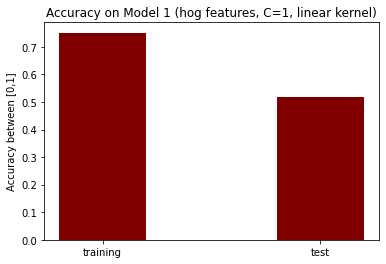

In [14]:
training_accuracy = classifier.score(trainFeatures, y_train)
test_accuracy = classifier.score(testFeatures, y_test)
accuracy = [training_accuracy, test_accuracy]
# creating the bar plot
plt.bar(['training', 'test'], accuracy, color ='maroon',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 1 (hog features, C=1, linear kernel)")
print("test accuracy:", test_accuracy, "training_accuracy:", training_accuracy)

In [15]:
classifier2 = SVC(C=1.0, kernel='rbf')

In [16]:
classifier2.fit(trainFeatures, y_train)

SVC()

In [17]:
test_accuracy2 = classifier2.score(testFeatures, y_test)
test_accuracy2

0.5875

test accuracy: 0.5875 training_accuracy: 0.9093


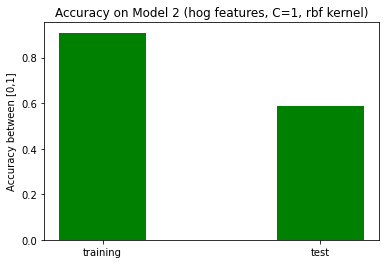

In [18]:
training_accuracy2 = classifier2.score(trainFeatures, y_train)
accuracy2 = [training_accuracy2, test_accuracy2]
# creating the bar plot
plt.bar(['training', 'test'], accuracy2, color ='green',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 2 (hog features, C=1, rbf kernel)")
print("test accuracy:", test_accuracy2, "training_accuracy:", training_accuracy2)

In [19]:
classifier3 = SVC(C=50.0, kernel='rbf')

In [20]:
classifier3.fit(trainFeatures, y_train)

SVC(C=50.0)

In [21]:
test_accuracy3 = classifier3.score(testFeatures, y_test)
test_accuracy3

0.6065

test accuracy: 0.6065 training_accuracy: 1.0


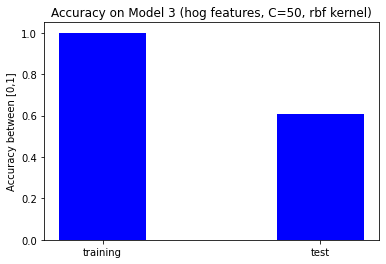

In [22]:
training_accuracy3 = classifier3.score(trainFeatures, y_train)
accuracy3 = [training_accuracy3, test_accuracy3]
# creating the bar plot
plt.bar(['training', 'test'], accuracy3, color ='blue',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 3 (hog features, C=50, rbf kernel)")
print("test accuracy:", test_accuracy3, "training_accuracy:", training_accuracy3)

In [23]:
training_target_vectors = tf.one_hot(y_train, depth=10)
testing_target_vectors = tf.one_hot(y_test, depth=10)

In [24]:
model = keras.Sequential()
model.compile(
    optimizer=keras.optimizers.SGD(),  # Optimizer
    loss=keras.losses.CategoricalCrossentropy(), # Cost or loss function
    metrics=[keras.metrics.CategoricalAccuracy()],
)
model.add(keras.Input(shape=(576,)))
model.add(layers.Dense(20, activation="sigmoid"))
model.add(layers.Dense(10, activation="sigmoid"))
history = model.fit(
    trainFeatures,
    training_target_vectors,
    batch_size=10,
    epochs=200,
    validation_data=(testFeatures, testing_target_vectors),
)


Epoch 1/200
1000/1000 [==============================] - 1s 496us/step - loss: 2.3189 - categorical_accuracy: 0.1123 - val_loss: 2.2844 - val_categorical_accuracy: 0.1300
Epoch 2/200
1000/1000 [==============================] - 0s 399us/step - loss: 2.2733 - categorical_accuracy: 0.1641 - val_loss: 2.2599 - val_categorical_accuracy: 0.1900
Epoch 3/200
1000/1000 [==============================] - 0s 394us/step - loss: 2.2453 - categorical_accuracy: 0.1954 - val_loss: 2.2291 - val_categorical_accuracy: 0.1970
Epoch 4/200
1000/1000 [==============================] - 0s 391us/step - loss: 2.2113 - categorical_accuracy: 0.2258 - val_loss: 2.1915 - val_categorical_accuracy: 0.2355
Epoch 5/200
1000/1000 [==============================] - 0s 398us/step - loss: 2.1711 - categorical_accuracy: 0.2489 - val_loss: 2.1479 - val_categorical_accuracy: 0.2460
Epoch 6/200
1000/1000 [==============================] - 0s 402us/step - loss: 2.1258 - categorical_accuracy: 0.2667 - val_loss: 2.1029 - val_cat

Epoch 49/200
1000/1000 [==============================] - 0s 393us/step - loss: 1.4019 - categorical_accuracy: 0.5211 - val_loss: 1.4688 - val_categorical_accuracy: 0.4910
Epoch 50/200
1000/1000 [==============================] - 0s 394us/step - loss: 1.3946 - categorical_accuracy: 0.5241 - val_loss: 1.4655 - val_categorical_accuracy: 0.4895
Epoch 51/200
1000/1000 [==============================] - 0s 386us/step - loss: 1.3877 - categorical_accuracy: 0.5282 - val_loss: 1.4606 - val_categorical_accuracy: 0.4950
Epoch 52/200
1000/1000 [==============================] - 0s 392us/step - loss: 1.3815 - categorical_accuracy: 0.5288 - val_loss: 1.4540 - val_categorical_accuracy: 0.4925
Epoch 53/200
1000/1000 [==============================] - 0s 388us/step - loss: 1.3743 - categorical_accuracy: 0.5285 - val_loss: 1.4495 - val_categorical_accuracy: 0.4915
Epoch 54/200
1000/1000 [==============================] - 0s 390us/step - loss: 1.3683 - categorical_accuracy: 0.5331 - val_loss: 1.4460 - v

1000/1000 [==============================] - 0s 392us/step - loss: 1.1841 - categorical_accuracy: 0.5980 - val_loss: 1.3593 - val_categorical_accuracy: 0.5195
Epoch 97/200
1000/1000 [==============================] - 0s 389us/step - loss: 1.1809 - categorical_accuracy: 0.6028 - val_loss: 1.3580 - val_categorical_accuracy: 0.5235
Epoch 98/200
1000/1000 [==============================] - 0s 390us/step - loss: 1.1786 - categorical_accuracy: 0.6019 - val_loss: 1.3538 - val_categorical_accuracy: 0.5265
Epoch 99/200
1000/1000 [==============================] - 0s 391us/step - loss: 1.1750 - categorical_accuracy: 0.6028 - val_loss: 1.3544 - val_categorical_accuracy: 0.5235
Epoch 100/200
1000/1000 [==============================] - 0s 391us/step - loss: 1.1726 - categorical_accuracy: 0.6066 - val_loss: 1.3533 - val_categorical_accuracy: 0.5175
Epoch 101/200
1000/1000 [==============================] - 0s 391us/step - loss: 1.1696 - categorical_accuracy: 0.6077 - val_loss: 1.3573 - val_categori

1000/1000 [==============================] - 0s 392us/step - loss: 1.0826 - categorical_accuracy: 0.6349 - val_loss: 1.3521 - val_categorical_accuracy: 0.5360
Epoch 144/200
1000/1000 [==============================] - 0s 393us/step - loss: 1.0824 - categorical_accuracy: 0.6357 - val_loss: 1.3505 - val_categorical_accuracy: 0.5325
Epoch 145/200
1000/1000 [==============================] - 0s 392us/step - loss: 1.0803 - categorical_accuracy: 0.6388 - val_loss: 1.3506 - val_categorical_accuracy: 0.5335
Epoch 146/200
1000/1000 [==============================] - 0s 390us/step - loss: 1.0791 - categorical_accuracy: 0.6391 - val_loss: 1.3519 - val_categorical_accuracy: 0.5315
Epoch 147/200
1000/1000 [==============================] - 0s 389us/step - loss: 1.0774 - categorical_accuracy: 0.6368 - val_loss: 1.3498 - val_categorical_accuracy: 0.5365
Epoch 148/200
1000/1000 [==============================] - 0s 391us/step - loss: 1.0762 - categorical_accuracy: 0.6391 - val_loss: 1.3499 - val_categ

1000/1000 [==============================] - 0s 391us/step - loss: 1.0244 - categorical_accuracy: 0.6551 - val_loss: 1.3739 - val_categorical_accuracy: 0.5340
Epoch 191/200
1000/1000 [==============================] - 0s 397us/step - loss: 1.0223 - categorical_accuracy: 0.6533 - val_loss: 1.3719 - val_categorical_accuracy: 0.5355
Epoch 192/200
1000/1000 [==============================] - 0s 399us/step - loss: 1.0221 - categorical_accuracy: 0.6553 - val_loss: 1.3735 - val_categorical_accuracy: 0.5330
Epoch 193/200
1000/1000 [==============================] - 0s 398us/step - loss: 1.0215 - categorical_accuracy: 0.6549 - val_loss: 1.3731 - val_categorical_accuracy: 0.5405
Epoch 194/200
1000/1000 [==============================] - 0s 383us/step - loss: 1.0196 - categorical_accuracy: 0.6531 - val_loss: 1.3743 - val_categorical_accuracy: 0.5325
Epoch 195/200
1000/1000 [==============================] - 0s 397us/step - loss: 1.0186 - categorical_accuracy: 0.6602 - val_loss: 1.3732 - val_categ

INFO:tensorflow:Assets written to: mymodel\assets
313/313 [==============================] - 0s 346us/step - loss: 1.0061 - categorical_accuracy: 0.6635
test accuracy =  0.5360000133514404 training accuracy =  0.6635000109672546


Text(0.5, 1.0, 'Accuracy on Model 4 (hog features, neural net, SGD, cross-entropy)')

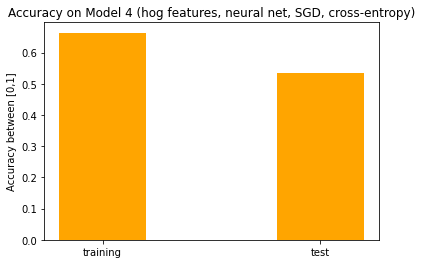

In [26]:
model.save('mymodel')
model = keras.models.load_model('mymodel')
test_accuracy4 = model.evaluate(testFeatures, testing_target_vectors)[1]
training_accuracy4 = model.evaluate(trainFeatures, training_target_vectors)[1]
accuracy4 = [training_accuracy4, test_accuracy4]
print('test accuracy = ', test_accuracy4, "training accuracy = ", training_accuracy4)
# creating the bar plot
plt.bar(['training', 'test'], accuracy4, color ='orange',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 4 (hog features, neural net, SGD, cross-entropy)")

In [27]:
from sklearn.svm import SVC
classifier5 = SVC(C=0.5, kernel='rbf')

In [28]:
classifier5.fit(trainFeatures, y_train)

SVC(C=0.5)

test accuracy: 0.563 training_accuracy: 0.7709


Text(0.5, 1.0, 'Accuracy on Model 5 (hog features, C=0.5, rbf kernel)')

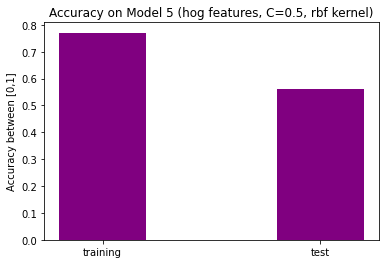

In [29]:
test_accuracy5 = classifier5.score(testFeatures, y_test)
training_accuracy5 = classifier5.score(trainFeatures, y_train)
accuracy5 = [training_accuracy5, test_accuracy5]
print("test accuracy:", test_accuracy5, "training_accuracy:", training_accuracy5)
# creating the bar plot
plt.bar(['training', 'test'], accuracy5, color ='purple',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 5 (hog features, C=0.5, rbf kernel)")

In [30]:
from sklearn.svm import SVC
classifier6 = SVC(C=10, kernel='rbf')

In [31]:
classifier6.fit(trainFeatures, y_train)

SVC(C=10)

test accuracy: 0.6065 training_accuracy: 1.0


Text(0.5, 1.0, 'Accuracy on Model 6 (hog features, C=10, rbf kernel)')

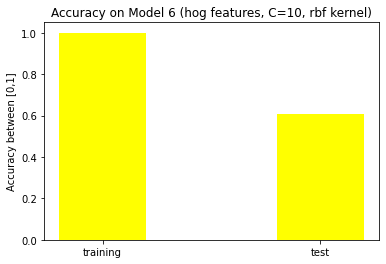

In [32]:
test_accuracy6 = classifier6.score(testFeatures, y_test)
training_accuracy6 = classifier6.score(trainFeatures, y_train)
accuracy6 = [training_accuracy6, test_accuracy6]
print("test accuracy:", test_accuracy6, "training_accuracy:", training_accuracy6)
# creating the bar plot
plt.bar(['training', 'test'], accuracy6, color ='yellow',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 6 (hog features, C=10, rbf kernel)")

In [33]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(32,32,3)))
model2.add(layers.Conv2D(filters=15, kernel_size=(5,5), activation='sigmoid', input_shape=(32,32,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(filters=10, kernel_size=(3,3), activation='sigmoid'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout((0.3))) 
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 15)        1140      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 10)        1360      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 10)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 360)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [37]:
model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Optimizer https://keras.io/api/optimizers/adam/
    loss=keras.losses.CategoricalCrossentropy(), # Cost or loss function
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [41]:
history = model2.fit(
    x_train,
    training_target_vectors,
    batch_size=10,
    epochs=100,
    validation_data=(x_test, testing_target_vectors),
)

Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7356 - categorical_accuracy: 0.3641 - val_loss: 1.6733 - val_categorical_accuracy: 0.3995
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7322 - categorical_accuracy: 0.3637 - val_loss: 1.6618 - val_categorical_accuracy: 0.3995
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7337 - categorical_accuracy: 0.3645 - val_loss: 1.6664 - val_categorical_accuracy: 0.3940
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7352 - categorical_accuracy: 0.3698 - val_loss: 1.6668 - val_categorical_accuracy: 0.3935
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7249 - categorical_accuracy: 0.3674 - val_loss: 1.6710 - val_categorical_accuracy: 0.3985
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.7255 - categorical_accuracy: 0.3691 - val_loss: 1.6738 - val_categorical_acc

1000/1000 [==============================] - 3s 3ms/step - loss: 1.6867 - categorical_accuracy: 0.3798 - val_loss: 1.6422 - val_categorical_accuracy: 0.4000
Epoch 50/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6839 - categorical_accuracy: 0.3818 - val_loss: 1.6386 - val_categorical_accuracy: 0.4100
Epoch 51/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6864 - categorical_accuracy: 0.3788 - val_loss: 1.6311 - val_categorical_accuracy: 0.4135
Epoch 52/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6755 - categorical_accuracy: 0.3917 - val_loss: 1.6272 - val_categorical_accuracy: 0.4065
Epoch 53/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6791 - categorical_accuracy: 0.3872 - val_loss: 1.6506 - val_categorical_accuracy: 0.4020
Epoch 54/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6794 - categorical_accuracy: 0.3849 - val_loss: 1.6176 - val_categorical_accuracy: 

1000/1000 [==============================] - 3s 3ms/step - loss: 1.6528 - categorical_accuracy: 0.3961 - val_loss: 1.6088 - val_categorical_accuracy: 0.4040
Epoch 98/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6514 - categorical_accuracy: 0.3926 - val_loss: 1.5947 - val_categorical_accuracy: 0.4265
Epoch 99/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6558 - categorical_accuracy: 0.3903 - val_loss: 1.6051 - val_categorical_accuracy: 0.4080
Epoch 100/100
1000/1000 [==============================] - 3s 3ms/step - loss: 1.6522 - categorical_accuracy: 0.4006 - val_loss: 1.5887 - val_categorical_accuracy: 0.4160


INFO:tensorflow:Assets written to: mymodel2\assets
313/313 [==============================] - 1s 2ms/step - loss: 1.5522 - categorical_accuracy: 0.4366
test accuracy =  0.41600000858306885 training accuracy =  0.436599999666214


Text(0.5, 1.0, 'Accuracy on Model 7 (CNN)')

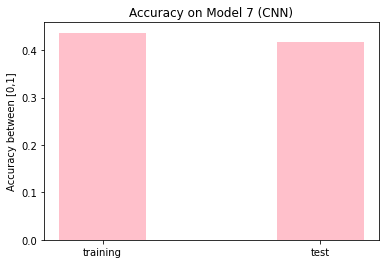

In [42]:
model2.save('mymodel2')
model2 = keras.models.load_model('mymodel2')
test_accuracy7 = model2.evaluate(x_test, testing_target_vectors)[1]
training_accuracy7 = model2.evaluate(x_train, training_target_vectors)[1]
accuracy7 = [training_accuracy7, test_accuracy7]
print('test accuracy = ', test_accuracy7, "training accuracy = ", training_accuracy7)
# creating the bar plot
plt.bar(['training', 'test'], accuracy7, color ='pink',
        width = 0.4)
plt.ylabel("Accuracy between [0,1]")
plt.title("Accuracy on Model 7 (CNN)")
